# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [2]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [3]:
path = '/Users/anastasiiamorozova/Downloads/07-homework-updated/02-dogs/NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx'
df = pd.read_excel(path, nrows=30000, na_values=['Unknown', 'UNKNOWN', 'unknown'])
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [4]:
#'name' is an animal's name
#'primary breed' is a type of dog


# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [5]:
#what is the most popular dog type in the dataset
#what is the oldest gog
#how many colors of dogs is there

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [6]:
df['Primary Breed'].value_counts(ascending=False).head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

## What are the most popular dog names?

In [7]:
df['Animal Name'].value_counts(ascending=False)

Animal Name
Max              202
Bella            193
Charlie          172
Lola             146
Rocky            140
                ... 
Bluno              1
DARBY              1
CHARLEY VIVAR      1
TINY               1
Squeeze            1
Name: count, Length: 13717, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [8]:
df[df['Animal Name'] == 'Anastasia']

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
6170,10016,Anastasia,F,Yorkshire Terrier,NaN,Black,Brown,Blond,2011-05-01,No,NaN,Yes,2015-05-06 15:31:19.873,2015-05-06,2016-05-06
7298,10468,Anastasia,F,Yorkshire Terrier,NaN,BLACK,TAN,NaN,2013-10-01,Yes,No,Yes,2015-05-13 22:59:30.477,2015-05-13,2017-05-14
8589,11229,Anastasia,F,NaN,Shih Tzu Mix,WHITE,BROWN,NaN,2009-01-01,Yes,No,No,2015-05-22 11:17:57.377,2015-05-22,2016-06-22
17906,10023,Anastasia,F,Bichon Frise,NaN,WHITE,APRICOT,NaN,2006-03-01,Yes,No,Yes,2015-07-03 10:27:05.143,2015-07-03,2016-08-11


In [9]:
df[df['Animal Name'] == 'Max']['Animal Name'].count()

202

In [10]:
df[df['Animal Name'] == 'Maxwell']['Animal Name'].count()

11

## What percentage of dogs are guard dogs?

In [11]:
df['Guard or Trained'].value_counts(normalize=True).mul(100)

Guard or Trained
No     99.914254
Yes     0.085746
Name: proportion, dtype: float64

## What are the actual numbers?

In [12]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [13]:
df['Guard or Trained'].head()

0     No
1     No
2    NaN
3     No
4    NaN
Name: Guard or Trained, dtype: object

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [14]:
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')

In [15]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [16]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts()

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [17]:
df['Year'] = df['Animal Birth'].dt.year

In [18]:
df['Age'] = 2024 - df['Year']

# Joining data together

In [19]:
df.head(1)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [20]:
zip_df = pd.read_csv('zipcodes-neighborhoods.csv')
zip_df.head(1)

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx


In [21]:
merged_df = df.merge(zip_df, left_on='Owner Zip Code', right_on='zip')
merged_df.head(10)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,16,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,13,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,13,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,17,Upper West Side,10024,Manhattan
5,10024,Barney,M,Beagle,NaN,BROWN,WHITE,ORANGE,2004-06-01,Yes,No,Yes,2014-09-29 15:58:56.570,2014-09-29,2016-10-01,2004,20,Upper West Side,10024,Manhattan
6,10024,Peyton,M,NaN,Black Mouth Cur,BRINDLE,BLACK,NaN,2012-08-01,Yes,No,Yes,2014-10-02 11:23:37.220,2014-10-02,2016-09-24,2012,12,Upper West Side,10024,Manhattan
7,10024,Phoebe,F,Cavalier King Charles Spaniel,NaN,GOLD,APRICOT,WHITE,2009-01-01,Yes,No,Yes,2014-10-06 15:13:32.223,2014-10-06,2016-10-25,2009,15,Upper West Side,10024,Manhattan
8,10024,Baci,F,Dachshund,NaN,Black,Tan,NaN,2013-02-01,Yes,No,Yes,2014-10-06 20:05:14.213,2014-10-06,2016-10-06,2013,11,Upper West Side,10024,Manhattan
9,10024,Delilah Eddy,F,German Shepherd Crossbreed,NaN,BLACK,TAN,NaN,2007-05-01,Yes,No,Yes,2014-10-09 13:55:43.907,2014-10-09,2019-10-11,2007,17,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [22]:
merged_df[merged_df['borough'] == 'Bronx']['Animal Name'].value_counts().head(1)

Animal Name
Bella    22
Name: count, dtype: int64

In [23]:
merged_df[merged_df['borough'] == 'Brooklyn']['Animal Name'].value_counts().head(1)

Animal Name
Max    46
Name: count, dtype: int64

In [24]:
merged_df[merged_df['borough'] == 'Manhattan']['Animal Name'].value_counts().head(1)

Animal Name
Lola    71
Name: count, dtype: int64

In [25]:
merged_df[merged_df['neighborhood'] == 'Upper East Side']['Animal Name'].value_counts().head(1)


Animal Name
Charlie    19
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [26]:
merged_df.groupby('neighborhood')['Primary Breed'].agg(lambda x: x.value_counts().idxmax())


neighborhood
Borough Park                                        Yorkshire Terrier
Bronx Park and Fordham                              Yorkshire Terrier
Bushwick and Williamsburg                           Yorkshire Terrier
Canarsie and Flatlands                                       Shih Tzu
Central Bronx                                       Yorkshire Terrier
Central Brooklyn                                             Shih Tzu
Central Harlem                                              Chihuahua
Central Queens                                      Yorkshire Terrier
Chelsea and Clinton                                         Chihuahua
East Harlem                                         Yorkshire Terrier
East New York and New Lots                          Yorkshire Terrier
Flatbush                                                     Shih Tzu
Gramercy Park and Murray Hill                       Yorkshire Terrier
Greenpoint                                                  Chihuahua
Greenwi

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [27]:
merged_df[merged_df['Spayed or Neut'] == 'Yes']['Primary Breed'].value_counts(ascending=True).head(5)

Primary Breed
Xoloitzcuintli                1
Dogue de Bordeaux             1
Greater Swiss Mountain Dog    1
English Toy Spaniel           1
Welsh Springer Spaniel        1
Name: count, dtype: int64

In [28]:
merged_df[merged_df['Spayed or Neut'] == 'Yes']['Animal Gender'].value_counts(ascending=True).head(5)

Animal Gender
         3
F    11620
M    12677
Name: count, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

<Axes: ylabel='borough'>

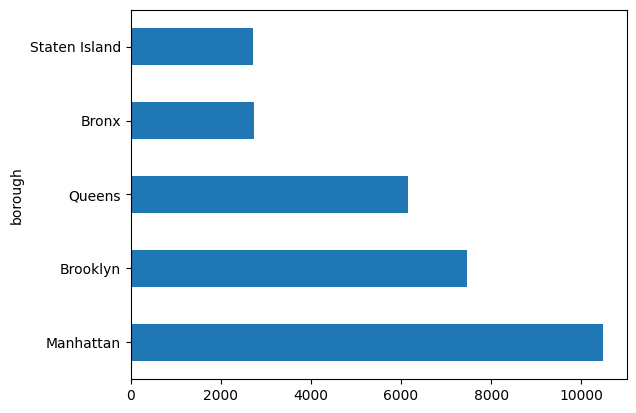

In [29]:
merged_df['borough'].value_counts().plot(kind='barh')

In [30]:
population = pd.read_csv('boro_population.csv')
population.head(1)

,borough,population,area_sqmi
0,Manhattan,1644518,23


## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [31]:
merged_df2 = merged_df.merge(population, left_on='borough', right_on='borough')
merged_df2.head(1)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024,Manhattan,1644518,23


In [34]:
merged_df2.to_excel('dogs2.xlsx')

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

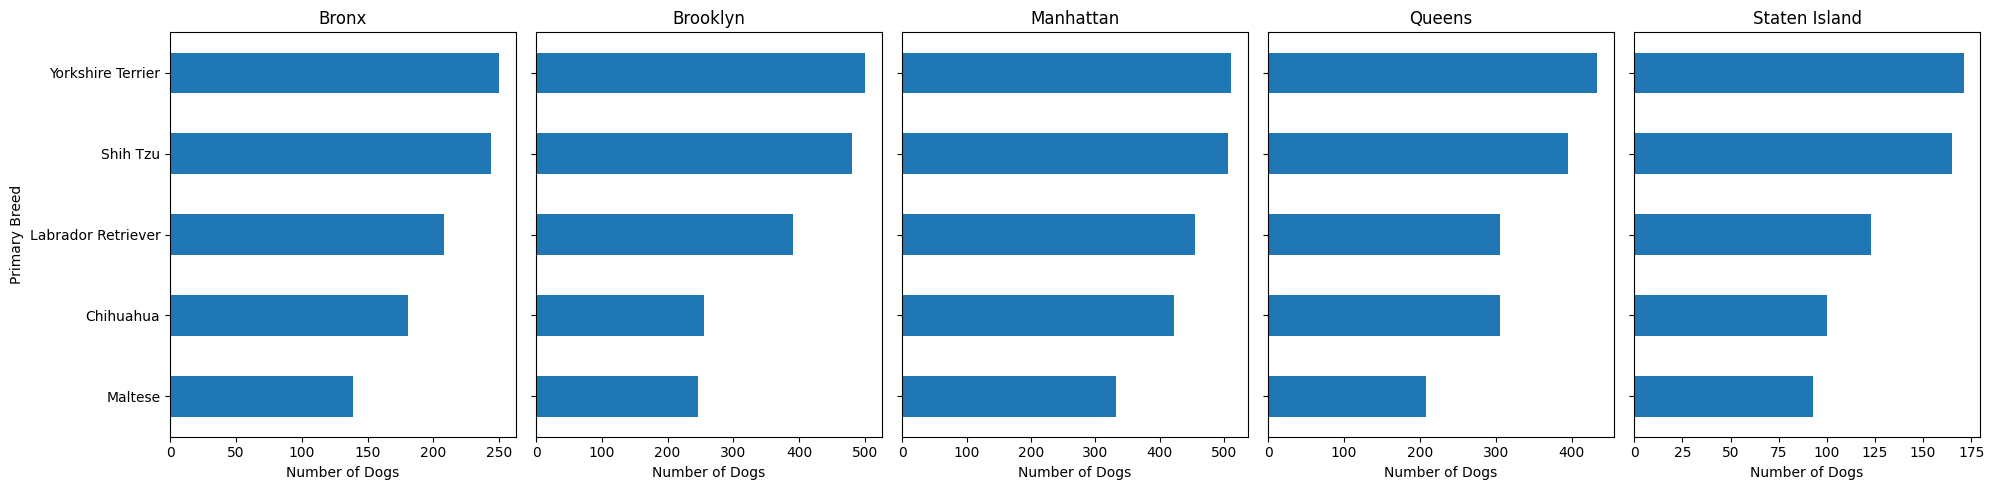

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = '/Users/anastasiiamorozova/Downloads/07-homework-updated/02-dogs/dogs2.csv'
data = pd.read_csv(file_path)

# Clean the data: Some primary breed values are NaN, we'll fill these with the information from secondary breed
data['Primary Breed'] = data['Primary Breed'].fillna(data['Secondary Breed'])

# We'll also need to remove any entries that still don't have a breed (if both primary and secondary were NaN)
data = data.dropna(subset=['Primary Breed'])

# Group the data by borough and breed, then count the number of each breed
breed_counts = data.groupby(['borough', 'Primary Breed']).size().reset_index(name='Count')

# Sort the groups and get the top 5 breeds for each borough
top_breeds_per_borough = breed_counts.groupby('borough').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(top_breeds_per_borough['borough'].unique()), figsize=(20, 5), sharey=True)

for (key, group), ax in zip(top_breeds_per_borough.groupby('borough'), axes.flatten()):
    group.sort_values(by='Count', ascending=True).plot(kind='barh', x='Primary Breed', y='Count', ax=ax, title=key, legend=None)
    ax.set_xlabel('Number of Dogs')

plt.tight_layout()
plt.show()
